In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import pickle
from src.cort_processor import *
from src.phase_decoder_support import *
from src.decoders import *
from sklearn import metrics
import scipy
from scipy import integrate
from matplotlib import colors
from src.phase_decoder_support import *
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from sklearn.metrics import r2_score
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
UL = 10
LL = 10

In [3]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/rollie_0203_session.pkl', 'rb') as inp:
    dataR = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/tequatl_0216_session.pkl', 'rb') as inp:
    dataT = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/meepo_1004_session.pkl', 'rb') as inp:
    dataM = pickle.load(inp)

In [3]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-2.0/rollie_0224_session.pkl', 'rb') as inp:
#     data200 = pickle.load(inp)
# rates200 = data200.data['rates']
# phase200 = data200.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-2.33/rollie_0224_session.pkl', 'rb') as inp:
#     data233 = pickle.load(inp)
# rates233 = data233.data['rates']
# phase233 = data233.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-2.66/rollie_0224_session.pkl', 'rb') as inp:
#     data266 = pickle.load(inp)
# rates266 = data266.data['rates']
# phase266 = data266.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-3.0/rollie_0224_session.pkl', 'rb') as inp:
#     data300 = pickle.load(inp)
# rates300 = data300.data['rates']
# phase300 = data300.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-3.33/rollie_0224_session.pkl', 'rb') as inp:
#     data333 = pickle.load(inp)
# rates333 = data333.data['rates']
# phase333 = data333.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-3.66/rollie_0224_session.pkl', 'rb') as inp:
#     data366 = pickle.load(inp)
# rates366 = data366.data['rates']
# phase366 = data366.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-4.0/rollie_0224_session.pkl', 'rb') as inp:
#     data400 = pickle.load(inp)
# rates400 = data400.data['rates']
# phase400 = data400.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-4.33/rollie_0224_session.pkl', 'rb') as inp:
#     data433 = pickle.load(inp)
# rates433 = data433.data['rates']
# phase433 = data433.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-4.66/rollie_0224_session.pkl', 'rb') as inp:
#     data466 = pickle.load(inp)
# rates466 = data466.data['rates']
# phase466 = data466.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-5.0/rollie_0224_session.pkl', 'rb') as inp:
#     data500 = pickle.load(inp)
# rates500 = data500.data['rates']
# phase500 = data500.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-5.33/rollie_0224_session.pkl', 'rb') as inp:
#     data533 = pickle.load(inp)
# rates533 = data533.data['rates']
# phase533 = data533.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-5.66/rollie_0224_session.pkl', 'rb') as inp:
#     data566 = pickle.load(inp)
# rates566 = data566.data['rates']
# phase566 = data566.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/-6.0/rollie_0224_session.pkl', 'rb') as inp:
#     data600 = pickle.load(inp)
# rates600 = data600.data['rates']
# phase600 = data600.data['phase']

In [4]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1/rollie_0210_session.pkl', 'rb') as inp:
#     data200 = pickle.load(inp)
# rates200 = data200.data['rates']
# phase200 = data200.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic4.0/rollie_0210_session.pkl', 'rb') as inp:
#     data300 = pickle.load(inp)
# rates300 = data300.data['rates']
# phase300 = data300.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/meepo_1010_session.pkl', 'rb') as inp:
#     data400 = pickle.load(inp)
# rates400 = data400.data['rates']
# phase400 = data400.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/meepo_1017_session.pkl', 'rb') as inp:
#     data500 = pickle.load(inp)
# rates500 = data500.data['rates']
# phase500 = data500.data['phase']
# # with open('/mnt/c/oobootoo/rat-fes/data/pickles/-6.0/rollie_0210_session.pkl', 'rb') as inp:
# #     data600 = pickle.load(inp)
# # rates600 = data600.data['rates']
# # phase600 = data600.data['phase']

In [5]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1/tequatl_0120_session.pkl', 'rb') as inp:
#     data1 = pickle.load(inp)
# rates1 = data1.data['rates']
# # phase1 = data1.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1/tequatl_0216_session.pkl', 'rb') as inp:
#     data2 = pickle.load(inp)
# rates2 = data2.data['rates']
# phase2 = data2.data['phase']

In [13]:
# data1 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/test/rollie/0120')
# data1.process()
data2 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/test/rollie/0203')
data2.process()

read from t=0s to t=408.64s
read from t=0s to t=252.75s


(array([[260., 120., 300., ..., 180., 200., 120.],
        [280., 260., 240., ..., 200., 160., 220.],
        [220., 240., 120., ..., 220., 180., 260.],
        ...,
        [180., 180., 100., ..., 200., 160., 360.],
        [ 20., 220., 220., ..., 160., 280., 240.],
        [ 80.,  80., 100., ...,  40., 120.,  80.]]),
 array([[ 24.75230494,  67.45695954,  99.11252442, ...,  55.21260268,
          70.95531163, 140.0708985 ],
        [ 18.0551122 ,  57.27813615,  97.6894775 , ...,  58.11853402,
          68.98631647, 139.6072406 ],
        [ 20.89648394,  61.46768585,  99.86372521, ...,  62.82476651,
          67.65432604, 128.10286187],
        ...,
        [ 45.56338561,  76.55500071,  82.44782612, ...,  51.42738538,
          78.0347134 , 143.18009052],
        [ 41.86804303,  72.80972743,  84.9706235 , ...,  54.25060384,
          77.68343017, 138.83454953],
        [ 45.8810283 ,  73.8066047 ,  88.17259619, ...,  50.81613149,
          73.01684151, 133.07064589]]),
 array([1., 0., 

In [16]:
# score1, _, _, pred1, test1, test_rates1, swing_mean1, vaf1, h_angle1, test_angle_rates1, test_angle_angle1, index1, time1 = data2.phase_train(upper_limit = UL, lower_limit = LL)
# pred_forelimb1 = test_wiener_filter(test_angle_rates1, h_angle1[:,6])
# pred_hindlimb1 = test_wiener_filter(test_angle_rates1, h_angle1[:,3])
score2, _, _, pred2, test2, test_rates2, swing_mean2, vaf2, h_angle2, test_angle_angle2, index2 = data2.phase_train(upper_limit = UL, lower_limit = LL)
pred_forelimb2 = test_wiener_filter(test_rates2, h_angle2[:,6])
pred_hindlimb2 = test_wiener_filter(test_rates2, h_angle2[:,3])

In [17]:
print(data2.data['phase'][0].shape)
print(time2)


(7745,)


NameError: name 'time2' is not defined

In [ ]:
to = time2[index2]

ti = np.linspace(to[0], to[-1], to.shape[0])

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6), sharex=True)
ax.plot(ti, to, color = 'k', alpha = 0.5, label = 'actual')

In [10]:
tsa = np.linspace(0, (pred_forelimb1.shape[0]*50)/1000,pred_forelimb1.shape[0])
fig, ax = plt.subplots(3,2, figsize=(6,6), sharex=True)
ax[0,0].plot(tsa, test1, color = 'k', alpha = 0.5, label = 'actual')
ax[0,0].plot(tsa, pred1, color = 'r', alpha = 0.5, label = 'predicted')
ax[0,0].set_ylabel('phase degree')
ax[1,0].plot(tsa, test_angle_angle1[:,6], color = 'k', alpha = 0.5, label = 'actual')
ax[1,0].plot(tsa, pred_forelimb1, color = 'r', alpha = 0.5, label = 'predicted')
ax[2,0].plot(tsa, test_angle_angle1[:,3], color = 'k', alpha = 0.5, label = 'actual')
ax[2,0].plot(tsa, pred_hindlimb1, color = 'r', alpha = 0.5, label = 'predicted')
ax[2,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('forelimb angle')
ax[2,0].set_ylabel('hindlimb angle')
ax[2,0].set_title('$R^2$ = {0:.4f}'.format(vaf1[3]))
ax[1,0].set_title('$R^2$ = {0:.4f}'.format(vaf1[6]))    
ax[0,0].set_title('circorr = {0:.4f}'.format(score1[2]))    
tsb = np.linspace(0, (test2.shape[0]*50)/1000,test2.shape[0])
tsc = np.linspace(0, (pred_forelimb2.shape[0]*50)/1000,pred_forelimb2.shape[0])

ax[0,1].plot(tsb, test2, color = 'k', alpha = 0.5, label = 'actual')
ax[0,1].plot(tsb, pred2, color = 'r', alpha = 0.5, label = 'predicted')
ax[1,1].plot(tsc, test_angle_angle2[:,6], color = 'k', alpha = 0.5, label = 'actual')
ax[1,1].plot(tsc, pred_forelimb2, color = 'r', alpha = 0.5, label = 'predicted')
ax[2,1].plot(tsc, test_angle_angle2[:,3], color = 'k', alpha = 0.5, label = 'actual')
ax[2,1].plot(tsc, pred_hindlimb2, color = 'r', alpha = 0.5, label = 'predicted')
ax[2,1].set_xlabel('time (s)')
ax[2,1].legend(loc = 'lower right')
ax[2,1].set_title('$R^2$ = {0:.4f}'.format(vaf2[3]))
ax[1,1].set_title('$R^2$ = {0:.4f}'.format(vaf2[6]))    
ax[0,1].set_title('circorr = {0:.4f}'.format(score2[2]))   
ax[0,1].set_xlim(122,133.5)


NameError: name 'pred_forelimb1' is not defined

Text(0, 0.5, 'hindlimb angle')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
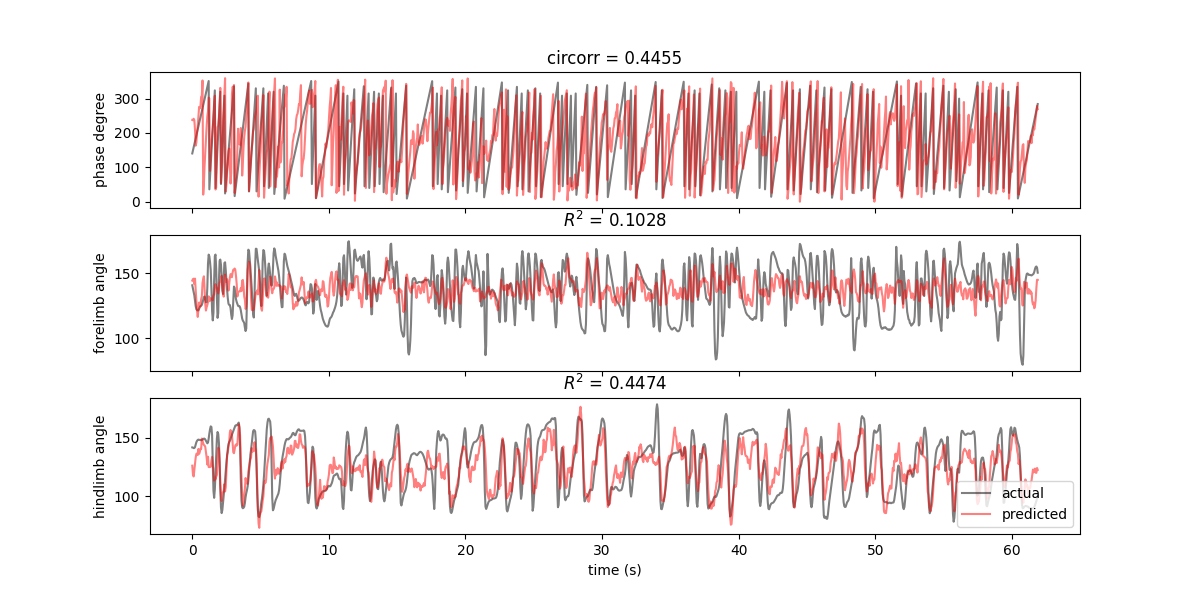

In [21]:

ti = np.linspace(0, (pred_forelimb2.shape[0]*50)/1000,pred_forelimb2.shape[0])

fig, ax = plt.subplots(3,1, figsize=(12,6), sharex=True)

ax[0].plot(ti, test2, color = 'k', alpha = 0.5, label = 'actual')
ax[0].plot(ti, pred2, color = 'r', alpha = 0.5, label = 'predicted')
ax[1].plot(ti, test_angle_angle2[:,6], color = 'k', alpha = 0.5, label = 'actual')
ax[1].plot(ti, pred_forelimb2, color = 'r', alpha = 0.5, label = 'predicted')
ax[2].plot(ti, test_angle_angle2[:,3], color = 'k', alpha = 0.5, label = 'actual')
ax[2].plot(ti, pred_hindlimb2, color = 'r', alpha = 0.5, label = 'predicted')
ax[2].legend(loc = 'lower right')
ax[2].set_title('$R^2$ = {0:.4f}'.format(vaf2[3]))
ax[1].set_title('$R^2$ = {0:.4f}'.format(vaf2[6]))    
ax[0].set_title('circorr = {0:.4f}'.format(score2[2]))   
# ax[0].set_xlim(122,133.5)
ax[0].set_ylabel('phase degree')
ax[2].set_xlabel('time (s)')
ax[1].set_ylabel('forelimb angle')
ax[2].set_ylabel('hindlimb angle')

In [4]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/rollie_0120_session.pkl', 'rb') as inp:
#     data1 = pickle.load(inp)
# rates1 = data1.data['rates']
# phase1 = data1.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/rollie_0203_session.pkl', 'rb') as inp:
#     data2 = pickle.load(inp)
# rates2 = data2.data['rates']
# phase2 = data2.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/rollie_0210_session.pkl', 'rb') as inp:
#     data3 = pickle.load(inp)
# rates3 = data3.data['rates']
# phase3 = data3.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/rollie_0216_session.pkl', 'rb') as inp:
#     data4 = pickle.load(inp)
# rates4 = data4.data['rates']
# phase4 = data4.data['phase']
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic/rollie_0224_session.pkl', 'rb') as inp:
#     data5 = pickle.load(inp)
# rates5 = data5.data['rates']
# phase5 = data5.data['phase']

ratesR = dataR.data['rates']
phaseR = dataR.data['phase']

ratesT = dataT.data['rates']
phaseT = dataT.data['phase']

ratesM = dataM.data['rates']
phaseM = dataM.data['phase']

score1, _, _, _, _, _, mean1, vaf1, _, _, _ = dataR.phase_train(upper_limit = UL, lower_limit = LL)
print(score1,vaf1[-1],vaf1[3])
score2, _, _, _, _, _, mean2, vaf2, _, _, _ = dataT.phase_train(upper_limit = UL, lower_limit = LL)
print(score2,vaf2[-1],vaf2[3])
score3, _, _, _, _, _, mean3, vaf3, _, _, _ = dataM.phase_train(upper_limit = UL, lower_limit = LL)
print(score3,vaf3[-1],vaf3[3])
# score4, _, _, _, _, _, _, vaf4, _, _, _, _ = data4.phase_train(upper_limit = UL, lower_limit = LL)
# print(score4,vaf4[-1],vaf4[3])
# score5, _, _, _, _, _, _, vaf5, _, _, _, _ = data5.phase_train(upper_limit = UL, lower_limit = LL)
# print(score5,vaf5[-1],vaf5[3])

[ 0.74868683  0.69732058  0.45553435  0.22746999 -0.06771231] 0.11275114341692198 0.5501821260664984
[ 0.70474699  0.66625192  0.37285153  0.12711047 -0.273019  ] -0.12209287120352477 0.033871968159033775
[ 0.68602963  0.64763407  0.31636675  0.10886527 -0.34079734] -0.055183850603404416 -0.5331363466741206


In [5]:
print(mean1, mean2, mean3)

278.30842126308204 267.9129982091863 279.3588523919079


In [6]:
rates_ll = [ratesR,ratesT,ratesM]
phase_ll = [phaseR,phaseT,phaseM]

In [9]:

def multicompass(rates_list_list, phase_list_list,upper_limit, lower_limit):
    titles = ['rat R (11 days post SCI)','rat T (24 days post SCI)', 'rat M (8 days post SCI)']
    swingmeans = [278.30842126308204, 267.9129982091863, 279.3588523919079]
    headings = []
    magns = []
    aucs = []
    for k in range(len(rates_list_list)):
        print(k+3)
        phase = phase_list_list[k]
        rates = rates_list_list[k]
        rect_phase_list = []
        for i in range(len(phase)):
            phase_copy = np.copy(phase[i])
            for j in range(phase_copy.shape[0]):
                phase_copy[j] = phase_copy[j] + 1
            phase_copy[0] = 0 
            phase_copy[-1] = 0
            rect_phase_list.append(phase_copy)
        form_rates, preform_phase = stitch_and_format(rates, rect_phase_list)
        form_phase = drop_phase(preform_phase, upper_limit, lower_limit)
        phase_12 = form_phase[np.nonzero(form_phase)]
        rates_12 = form_rates[np.nonzero(form_phase),:][0]
        rate_hodl = []
        for p in range(len(rates)):
            rate_hodl.append(rates[p][:-9,:])
        rate_hodl = np.vstack(rate_hodl)
        rates_rs = rate_hodl[np.nonzero(form_phase),:][0]
        phase_angles, swing_mean = get_phase_angles(phase_12)
        sin_arr, cos_arr = sine_and_cosine(phase_angles)          
        AUC, _, _, _, test_arctans, predicted_arctans, _ = parallel_decoder(X=rates_12, Y1=sin_arr, Y2=cos_arr,printing = False)
        aucs.append(AUC)
        phase_rs = np.radians(phase_angles-180)
        magn = []
        heading = []
        print(rates_rs.shape)
        print(phase_angles.shape)
        for j in range(rates_rs.shape[1]):
            sum1 = 0
            sum_sin = 0
            sum_cos = 0
            for i in range(rates_rs.shape[0]):
                sum1 = sum1 + rates_rs[i,j]
                sum_sin = sum_sin + rates_rs[i,j]*np.sin(phase_rs[i])
                sum_cos = sum_cos + rates_rs[i,j]*np.cos(phase_rs[i])
            sin_bar = sum_sin/sum1
            cos_bar = sum_cos/sum1
            r = (sin_bar**2 + cos_bar**2)**(1/2)
            theta = np.arctan2(sin_bar, cos_bar)
            magn.append(r)
            heading.append(theta)
        magn = np.array(magn)
        heading = np.array(heading)
        magns.append(magn)
        headings.append(heading)
        
        
    arrowprops=None
    n = len(headings)
    fig, ax = plt.subplots(n,1, figsize=(3,9),subplot_kw=dict(polar=True))
    for i in range(len(headings)):
        angles = headings[i]
        radii = magns[i]
        ax[i].fill_between(np.linspace(0, np.radians(swingmeans[i]), 100), 0,1, color = 'r', alpha = 0.225, label='Stance')
        ax[i].fill_between(np.linspace(np.radians(swingmeans[i]), 2*np.pi, 100), 0,1, color = 'g', alpha = 0.225, label = 'Swing')
        if i == 0:
            ax[i].legend(loc= 'lower left')
        kw = dict(arrowstyle="->", color='k')
        if arrowprops:
            kw.update(arrowprops)
        [ax[i].annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
         angle, radius in zip(angles, radii)]

        ax[i].set_ylim(0, np.max(radii))
        ax[i].set_title(titles[i])
        # ax[i].set_title("AUC:{0:.3f} / $R^2$:{1:.3f}".format(aucs[i],r2s[i]))
    fig.tight_layout()
    return
        
def stitch_and_format(firing_rates_list=None,
            resampled_angles_list=None, N = 10):
 
        assert isinstance(firing_rates_list, list), 'rates must be list'
        assert isinstance(resampled_angles_list, list), 'angles must be list'
        formatted_rates = []
        formatted_angles = []

        for i in range(len(firing_rates_list)):
            f_rate, f_angle = format_data(firing_rates_list[i],
                    resampled_angles_list[i], N)
            formatted_rates.append(f_rate)
            formatted_angles.append(f_angle)


        if len(formatted_rates)==1: #check if just single array in list
            rates = np.array(formatted_rates)
        else: #if multiple, stitch into single array
            rates = np.vstack(formatted_rates)

        if len(formatted_angles)==1: #check if single array
            kin = np.array(formatted_angles)
        elif formatted_angles[0].ndim > 1: #check if multiple angles
            kin = np.vstack(formatted_angles)
        else:
            kin = np.hstack(formatted_angles)
        
        return np.squeeze(rates), np.squeeze(kin)

3
(7731, 32)
(7731,)
4
(6643, 32)
(6643,)
5
(9510, 32)
(9510,)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
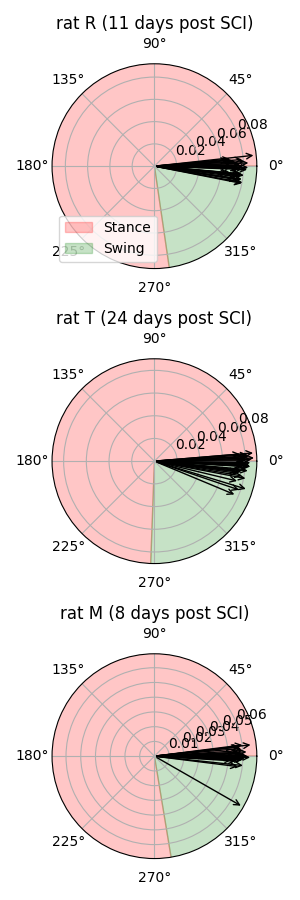

In [10]:
multicompass(rates_ll, phase_ll, UL, LL)

In [56]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/-3.0/rollie_0203_session.pkl', 'rb') as inp:
    data1 = pickle.load(inp)
rates1 = data1.data['rates']
angles1 = data1.data['angles']
phase1 = data1.data['phase']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/-5.0/rollie_0203_session.pkl', 'rb') as inp:
    data2 = pickle.load(inp)
rates2 = data2.data['rates']
angles2 = data2.data['angles']
phase2 = data2.data['phase']

0.7532043173841552
0.7203482368683939
0.6527413958257005
0.7955562264336483
0.7681348876563021
0.7947475810317889
0.7608465740721315
0.6927901095647949
0.8065753723370923
0.716931014003062


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
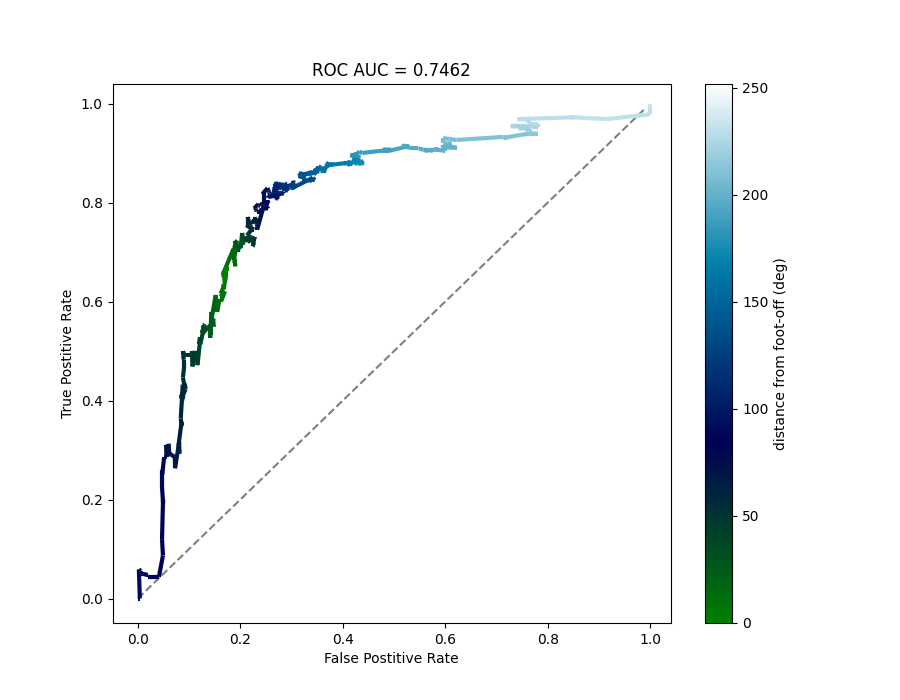

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
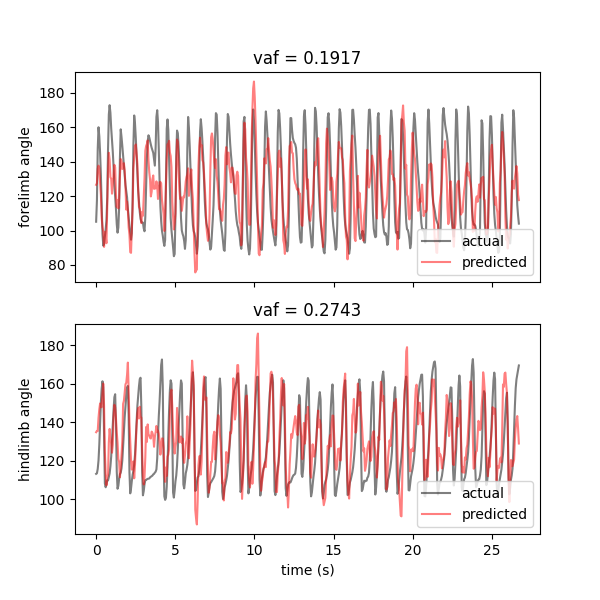

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
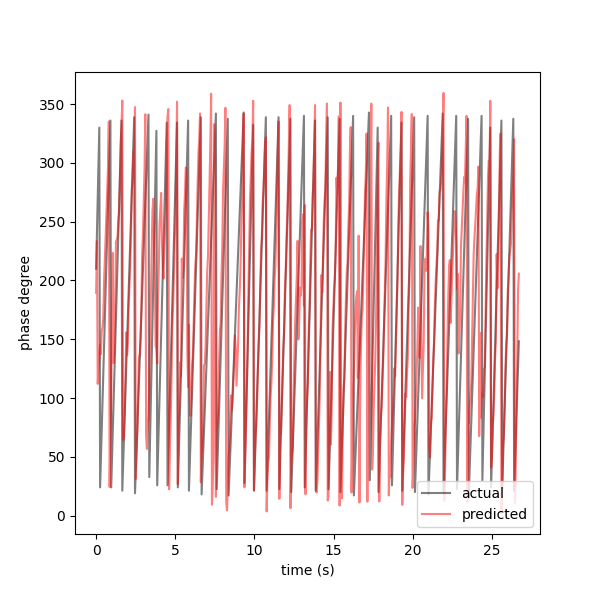

In [5]:
score1, _, _, pred1, test1, test_rates1, swing_mean1, vaf1, h_angle1, test_angle_rates1, test_angle_angle1, index1 = data1.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test1, pred1, swing_mean1, display_score=score1, plotting = True)
show_comparison(vaf1, test_angle_angle1, test_angle_rates1, h_angle1)
ts1 = np.linspace(0, (test1.shape[0]*50)/1000,test1.shape[0])
fig1, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts1, test1, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts1, pred1, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
sin_t1, cos_t1 = sine_and_cosine(test1)
sin_p1, cos_p1 = sine_and_cosine(pred1)

0.6994785776541458
0.6704062098972131
0.6150917823691501
0.676983825036532
0.6730051665613016
0.6757605132605874
0.7678634410281806
0.7146222291015198
0.6808361769438802
0.7320777574640407


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
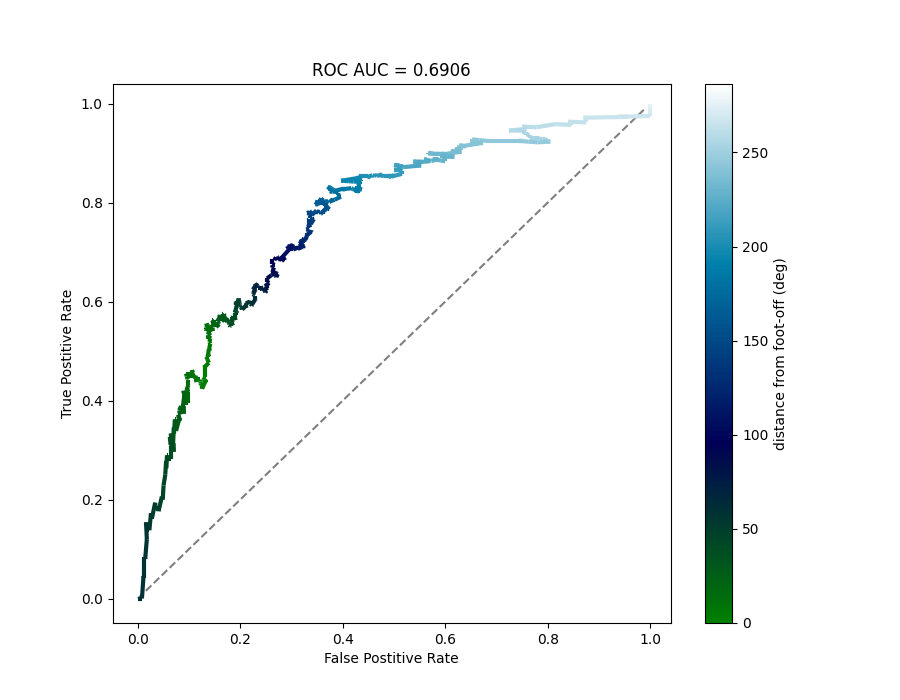

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
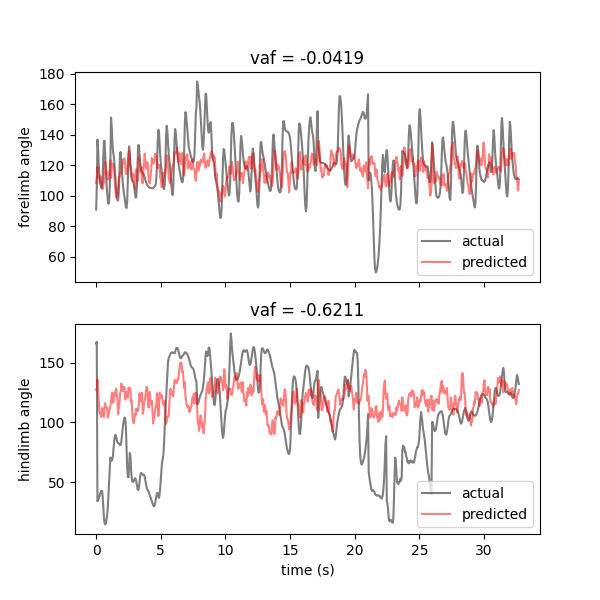

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
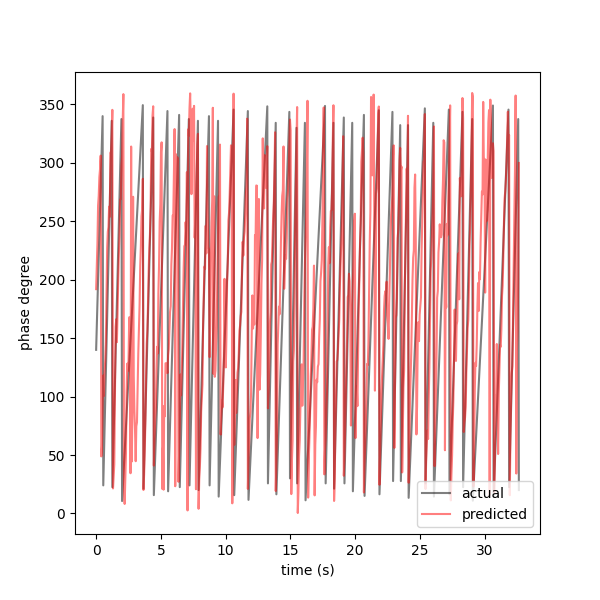

In [6]:
score2, _, _, pred2, test2, test_rates2, swing_mean2, vaf2, h_angle2, test_angle_rates2, test_angle_angle2, index2 = data2.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test2, pred2, swing_mean2, score2, plotting = True)
show_comparison(vaf2, test_angle_angle2, test_angle_rates2, h_angle2)
ts2 = np.linspace(0, (test2.shape[0]*50)/1000,test2.shape[0])
fig2, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts2, test2, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts2, pred2, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
sin_t2, cos_t2 = sine_and_cosine(test2)
sin_p2, cos_p2 = sine_and_cosine(pred2)

0.5959951756228239 -0.2607795856096102 -0.8699708378872645
0.6660444894991333 -0.12076663745129382 -0.6638109135806195


NameError: name 'data5' is not defined

In [65]:
barrates2 = rates2[0][index2]
barrates1 = rates1[0][index2]

In [66]:
test_rates2.shape

(498, 320)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
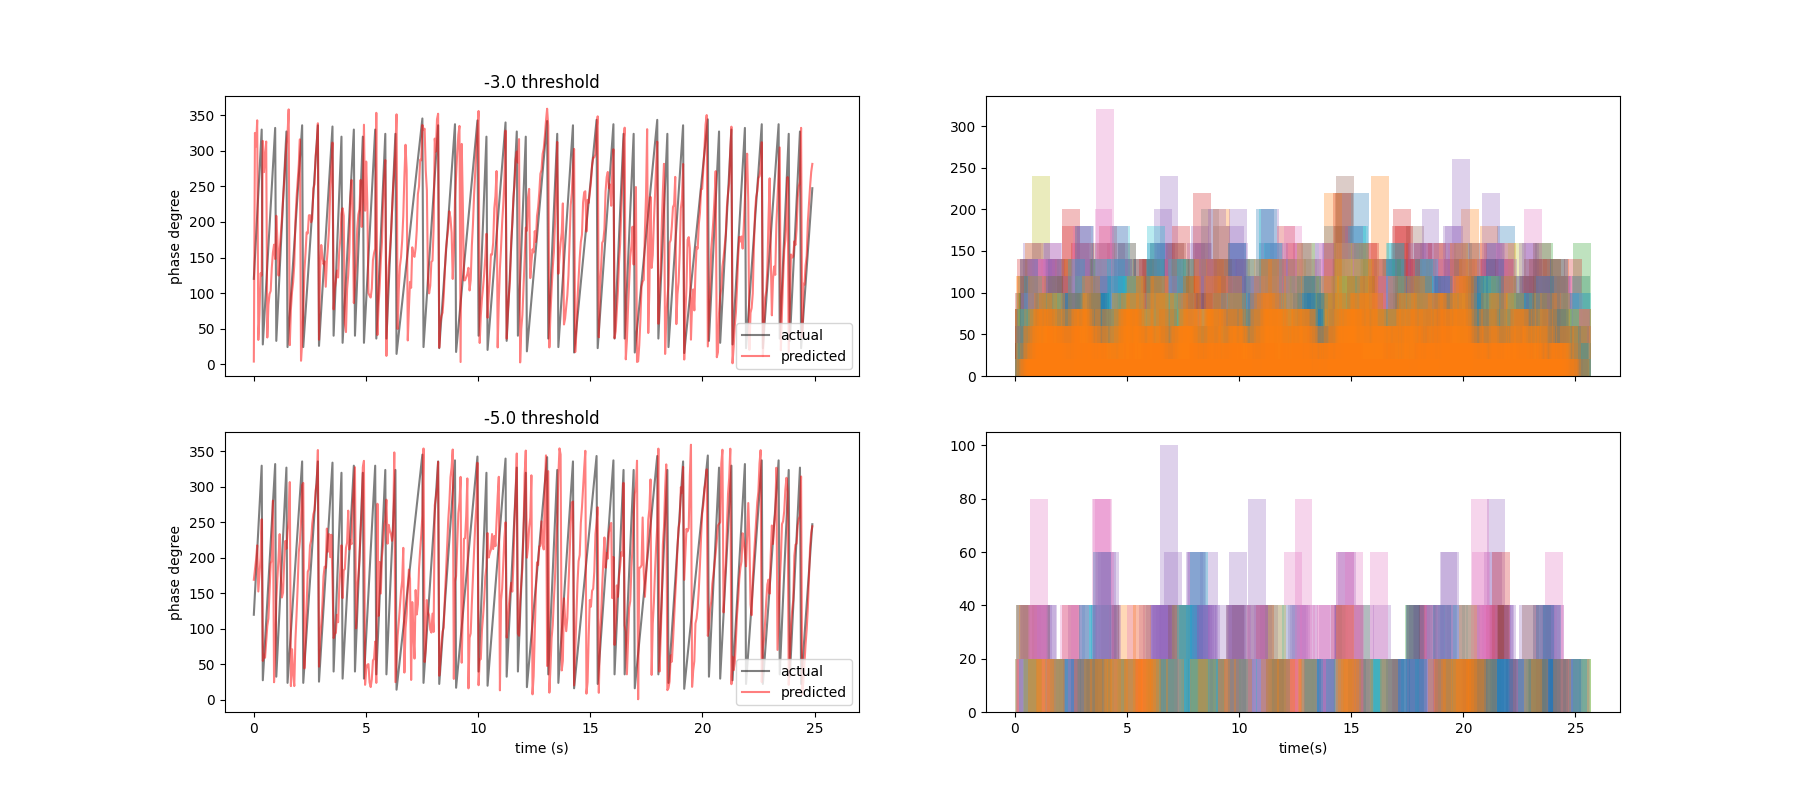

In [67]:
ts1 = np.linspace(0, (test1.shape[0]*50)/1000,test1.shape[0])
fig1, ax = plt.subplots(2,2, figsize=(18,8), sharex=True)
ax[0,0].plot(ts1, test1, color = 'k', alpha = 0.5, label = 'actual')
ax[0,0].plot(ts1, pred1, color = 'r', alpha = 0.5, label = 'predicted')
ax[0,0].set_ylabel('phase degree')
ax[0,0].legend(loc='lower right')
# ax[0,0].set_xlabel('time (s)')
ax[0,0].set_title("-3.0 threshold")

ts2 = np.linspace(0, (test2.shape[0]*50)/1000,test2.shape[0])
ax[1,0].plot(ts2, test2, color = 'k', alpha = 0.5, label = 'actual')
ax[1,0].plot(ts2, pred2, color = 'r', alpha = 0.5, label = 'predicted')
ax[1,0].set_ylabel('phase degree')
ax[1,0].legend(loc='lower right')
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_title("-5.0 threshold")

ax[1,1].set_xlabel('time(s)')
for i in range(barrates2.shape[1]):
    ax[1,1].bar(x=ts1, height= barrates2[:,i], alpha = 0.3, align='edge')
    ax[0,1].bar(x=ts1, height= barrates1[:,i], alpha = 0.3, align='edge')